Accuracy: 0.8324


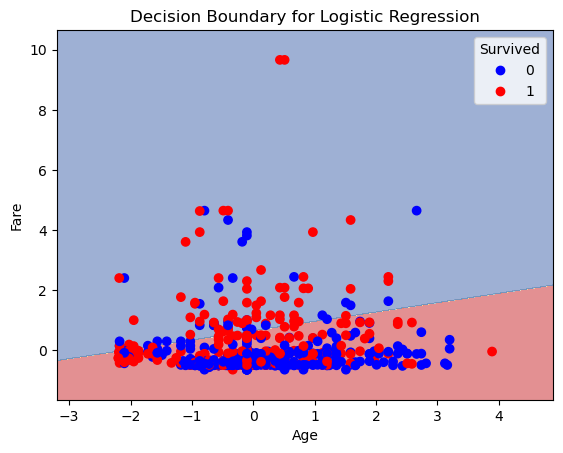

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565419      1      0 -0.502163       False   
1         1       1    1  0.663488      1      0  0.786404       False   
2         1       3    1 -0.258192      0      0 -0.488580       False   
3         1       1    1  0.433068      1      0  0.420494       False   
4         0       3    0  0.433068      0      0 -0.486064       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\soham\Downloads\archive.zip')
data.head()
data=data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex']=data['Sex'].map({'male':0,'female':1})
data=pd.get_dummies(data, columns=['Embarked'],drop_first=True)
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
data['Fare'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
X = data.drop('Survived', axis=1).values.astype(np.float64)  

y = data['Survived'].values.astype(int)  

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.asarray(z, dtype=np.float64) 
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features, dtype=np.float64)          
        self.bias = 0.0  
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)


            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)
    
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

accuracy_score = accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy_score:.4f}')
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend(*scatter.legend_elements(), title="Survived")
    plt.title('Decision Boundary for Logistic Regression')
    plt.show()

X_train_subset = X_train[:, [2, 5]] 
model.fit(X_train_subset, y_train)  
plot_decision_boundary(X_train_subset, y_train, model)
data_df = pd.DataFrame(data)

print(data_df.head())